In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kiva_loans = pd.read_csv("../data/kiva/kiva_loans.csv")

In [4]:
kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [5]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

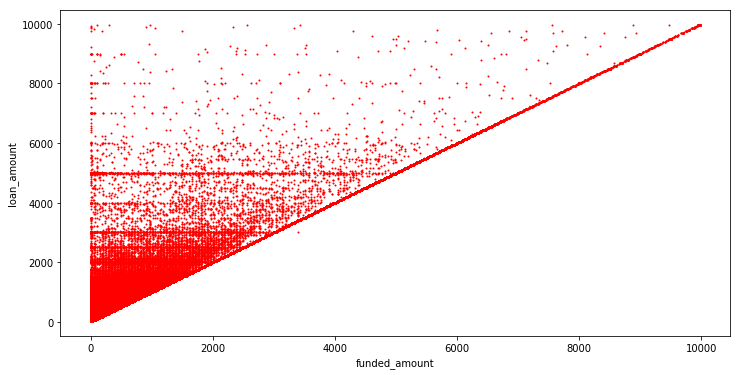

In [9]:
(kiva_loans[(kiva_loans.funded_amount < 10000) & (kiva_loans.loan_amount < 10000)]
 .plot.scatter(x="funded_amount", y="loan_amount", figsize=(12, 6), s=1, color='red'))

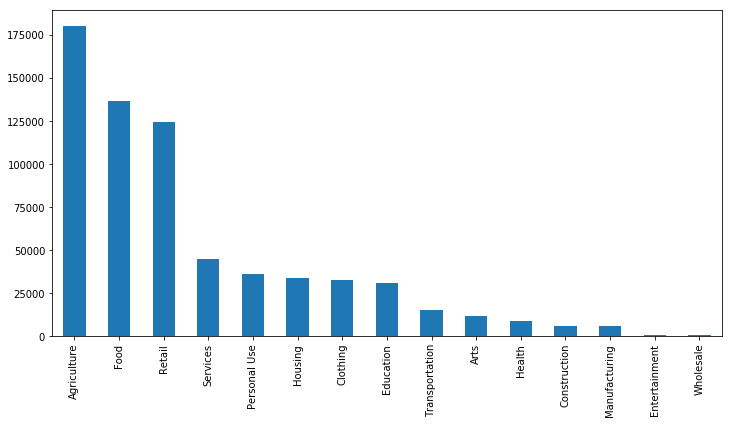

In [17]:
kiva_loans.sector.value_counts().plot(kind="bar", figsize=(12, 6))

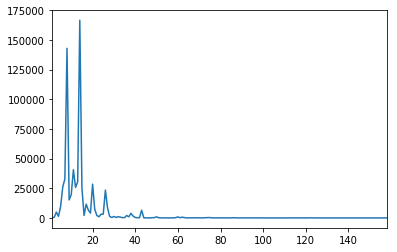

In [18]:
kiva_loans.term_in_months.value_counts().sort_index().plot.line()

In [20]:
kiva_loans.tags.value_counts()

user_favorite                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             27088
#Parent, #Woman Owned Biz                                                                                                                                                                                                                                                                                                                                                                                               

Text(0.5,1,'Most popular loan regions in the United States')

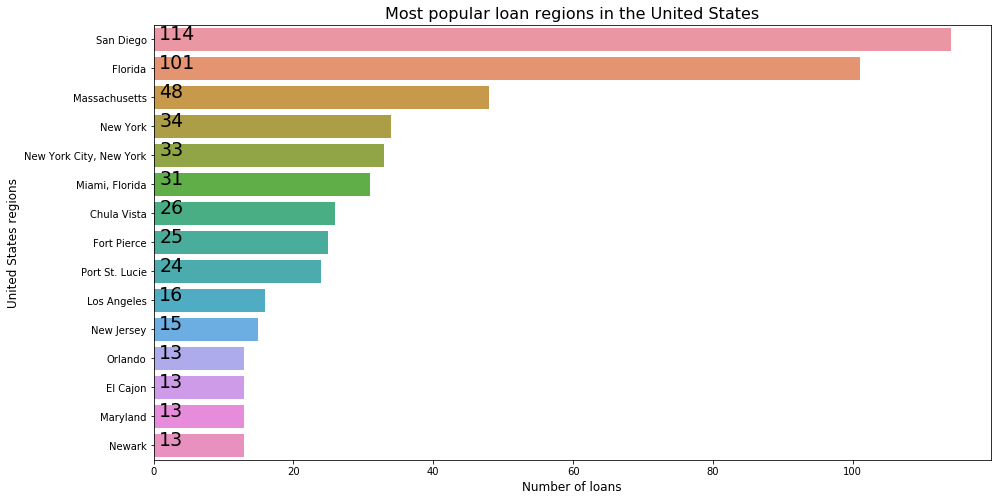

In [28]:
country = "United States"

plt.figure(figsize=(15,8))
usa = kiva_loans[kiva_loans.country == country]
usa_regions = usa.region.value_counts().head(15)
sns.barplot(usa_regions.values, usa_regions.index)
for i, v in enumerate(usa_regions.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Number of loans', fontsize=12)
plt.ylabel('{} regions'.format(country), fontsize=12)
plt.title("Most popular loan regions in the {}".format(country), fontsize=16)

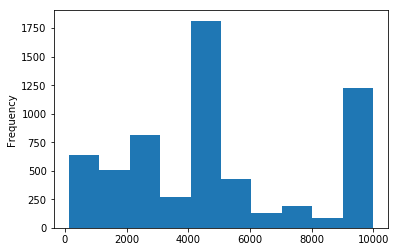

In [45]:
usa.loan_amount.plot(kind="hist", x="Amount of money", y="Count")

In [32]:
kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000
